**Author: Alexander Kollmann, 12/2022**

---

**Funktion**

FHIR - Bundle/ Ressourcen zur weiteren Verarbeitung darstellen

Überblick über die Inhalte von einem FHIR - Bundle/ Ressourcen bekommen

FHIR - Bundle/ Ressourcen zur weiteren Verarbeitung in ein Dataframe laden

---



**Referenzen**

https://www.health-atlas.de/projects/36#datafiles

https://towardsdatascience.com/how-to-parse-json-data-with-python-pandas-f84fbd0b1025

https://codebeautify.org/jsonviewer


---



In [ ]:
import json
import requests
import pandas as pd
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
%matplotlib inline

# Daten aus einem FHIR-Bundle einlesen

Ziel: mit der Datenstruktur vertraut machen

In [ ]:
# ein JSON-File von URL laden
url = "https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-10UKE.json"

df = pd.read_json(url)
df.head()

df.describe()

,resourceType,type,entry
count,88,88,88
unique,1,1,28
top,Bundle,transaction,{'resource': {'resourceType': 'MedicationAdmin...
freq,88,88,6


In [ ]:
print("Anzahl entry: " + str(df.count()['entry']))

Anzahl entry: 88


In [ ]:
# Ressource anzeigen
# siehe auch https://codebeautify.org/jsonviewer

df.entry[10]['resource']

{'resourceType': 'Medication',
 'id': '10UKE-M--132842198',
 'meta': {'profile': ['https://www.medizininformatik-initiative.de/fhir/core/modul-medikation/StructureDefinition/Medication']},
 'identifier': [{'value': '10UKE-M--132842198'}],
 'code': {'coding': [{'system': 'http://fhir.de/CodeSystem/ifa/pzn',
    'code': '01647838',
    'userSelected': False},
   {'system': 'http://fhir.de/CodeSystem/dimdi/atc',
    'code': 'B01AF02',
    'userSelected': False}],
  'text': 'Apixapan'},
 'ingredient': [{'itemCodeableConcept': {'coding': [{'system': 'http://fhir.de/CodeSystem/ask',
      'display': 'no code defined'}]},
   'strength': {'numerator': {'value': 5,
     'unit': 'mg',
     'system': 'http://unitsofmeasure.org',
     'code': 'mg'},
    'denominator': {'value': 1,
     'system': 'http://XXX',
     'code': 'Tabletten'}}}]}

In [ ]:
df.entry[11]['resource']

{'resourceType': 'MedicationAdministration',
 'meta': {'profile': ['https://www.medizininformatik-initiative.de/fhir/core/modul-medikation/StructureDefinition/MedicationAdministration']},
 'status': 'completed',
 'medicationReference': {'reference': 'Medication/10UKE-M--132842198'},
 'subject': {'reference': 'Patient/10UKE'},
 'context': {'reference': 'Encounter/10UKEE-1'},
 'effectivePeriod': {'start': '2020-09-04T00:00:00+02:00',
  'end': '2020-09-09T00:00:00+02:00'},
 'dosage': {'dose': {'value': 2,
   'unit': 'Tabletten',
   'system': 'http://unitsofmeasure.org',
   'code': '1'}}}

In [ ]:
# tiefer in die Struktur eintauchen
item = df.entry[10]['resource']['code']['coding'][1]['code']
item

'B01AF02'

In [ ]:
# resourceType anzeigen
df.entry[0]['resource']['resourceType']

'Encounter'

In [ ]:
# Loop über alle entry und die FHIR-Ressorcen-Typen anzeigen
for entry in df['entry']:
    resource = entry.get('resource')
    #print(resource.get('id'), end=': ')
    print(resource.get('resourceType'))

Encounter
Condition
Medication
MedicationAdministration
Medication
MedicationAdministration
Medication
MedicationAdministration
Medication
MedicationAdministration
Medication
MedicationAdministration
Medication
MedicationAdministration
Medication
MedicationAdministration
Medication
MedicationAdministration
Medication
MedicationAdministration
Medication
MedicationAdministration
Medication
MedicationAdministration
Medication
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministration
MedicationAdministratio

In [ ]:
# Entry in ein Dataframe laden

df_entry = pd.json_normalize(df['entry'])
#df_entry.head(3)
df_entry

,resource.resourceType,resource.meta.profile,resource.status,resource.class.system,resource.class.code,resource.serviceType.coding,resource.subject.reference,resource.period.start,resource.period.end,resource.partOf.reference,...,resource.context.reference,resource.effectivePeriod.start,resource.effectivePeriod.end,resource.dosage.dose.value,resource.dosage.dose.unit,resource.dosage.dose.system,resource.dosage.dose.code,resource.name,resource.gender,resource.birthDate
0,Encounter,[https://www.medizininformatik-initiative.de/f...,finished,https://www.medizininformatik-initiative.de/fh...,ub,[{'system': 'https://www.medizininformatik-ini...,Patient/10UKE,2020-09-04T00:00:00+02:00,2020-09-09T00:00:00+02:00,Encounter/10UKEE-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Condition,[https://www.medizininformatik-initiative.de/f...,NaN,NaN,NaN,NaN,Patient/10UKE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Medication,[https://www.medizininformatik-initiative.de/f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MedicationAdministration,[https://www.medizininformatik-initiative.de/f...,completed,NaN,NaN,NaN,Patient/10UKE,NaN,NaN,NaN,...,Encounter/10UKEE-1,2020-09-04T00:00:00+02:00,2020-09-09T00:00:00+02:00,3.0,"Pulver zur Herstellung einer Injektions-, Infu...",http://unitsofmeasure.org,1,NaN,NaN,NaN
4,Medication,[https://www.medizininformatik-initiative.de/f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,MedicationAdministration,[https://www.medizininformatik-initiative.de/f...,completed,NaN,NaN,NaN,Patient/10UKE,NaN,NaN,NaN,...,Encounter/10UKEE-1,2020-09-04T00:00:00+02:00,2020-09-09T00:00:00+02:00,1.0,Tabletten,http://unitsofmeasure.org,1,NaN,NaN,NaN
84,MedicationAdministration,[https://www.medizininformatik-initiative.de/f...,completed,NaN,NaN,NaN,Patient/10UKE,NaN,NaN,NaN,...,Encounter/10UKEE-1,2020-09-04T00:00:00+02:00,2020-09-09T00:00:00+02:00,2.0,Inhalationsampullen,http://unitsofmeasure.org,1,NaN,NaN,NaN
85,MedicationAdministration,[https://www.medizininformatik-initiative.de/f...,completed,NaN,NaN,NaN,Patient/10UKE,NaN,NaN,NaN,...,Encounter/10UKEE-1,2020-09-04T00:00:00+02:00,2020-09-09T00:00:00+02:00,4.0,Injektionslösung,http://unitsofmeasure.org,1,NaN,NaN,NaN
86,Patient,[https://www.medizininformatik-initiative.de/f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'use': 'official', 'family': 'w', 'given': [...",female,1992-01-01


In [ ]:
# Datenframe der Entry
df_entry['resource.resourceType'].describe()

count                           88
unique                           5
top       MedicationAdministration
freq                            72
Name: resource.resourceType, dtype: object

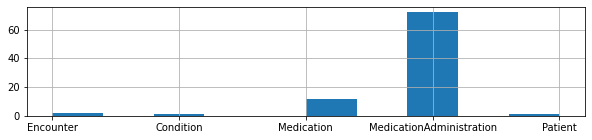

In [ ]:
# Verteilung der FHIR-Ressourcen

df_entry['resource.resourceType'].hist(figsize=(10,2))

In [ ]:
# die Patienten-Ressource genauer anschauen
df_entry.loc[(df_entry['resource.resourceType']=='Patient')] 


,resource.resourceType,resource.meta.profile,resource.status,resource.class.system,resource.class.code,resource.serviceType.coding,resource.subject.reference,resource.period.start,resource.period.end,resource.partOf.reference,...,resource.context.reference,resource.effectivePeriod.start,resource.effectivePeriod.end,resource.dosage.dose.value,resource.dosage.dose.unit,resource.dosage.dose.system,resource.dosage.dose.code,resource.name,resource.gender,resource.birthDate
86,Patient,[https://www.medizininformatik-initiative.de/f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'use': 'official', 'family': 'w', 'given': [...",female,1992-01-01


# Dateien einlesen (Loop über ein Directroy)

Ziel: Einen Überblick über die Daten aus versch. FHIR-Export (Bundles) bekommen

In [ ]:
! pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup
import re 

# URL on the Github where the json files are stored
github_url = 'https://github.com/alexontour/snippets/tree/main/testdata'

result = requests.get(github_url)

soup = BeautifulSoup(result.text, 'html.parser')

# Find all 'a' tags (which define hyperlinks): a_tags => bs4.element.ResultSet
a_tags = soup.find_all('a')

# Store a list of urls ending in .csv: urls => list
urls = ['https://raw.githubusercontent.com'+re.sub('/blob', '', link.get('href')) 
        for link in a_tags  if '.json' in link.get('href')]

print("Anzahl der Dateien: " + str(len(urls)))
print("URLs: " + str(urls))

Anzahl der Dateien: 20
URLs: ['https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-10UKE.json', 'https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-11UKE.json', 'https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-12UKE.json', 'https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-13UKE.json', 'https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-14UKE.json', 'https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-15UKE.json', 'https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-16UKE.json', 'https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-17UKE.json', 'https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-18UKE.json', 'https://raw.githubusercontent.com/alexontour/snippe

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-10UKE.json


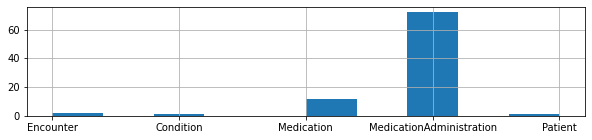

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-11UKE.json


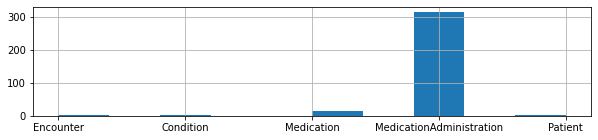

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-12UKE.json


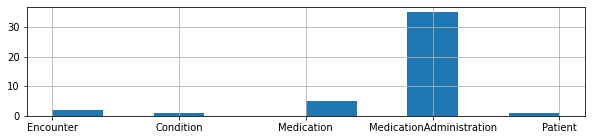

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-13UKE.json


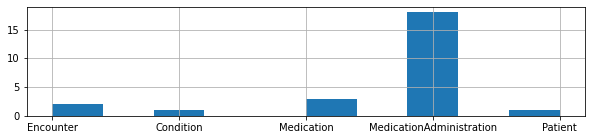

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-14UKE.json


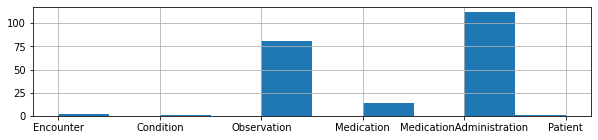

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-15UKE.json


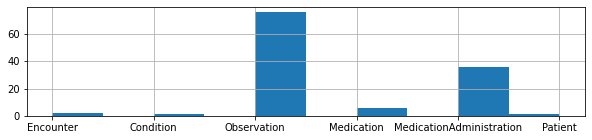

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-16UKE.json


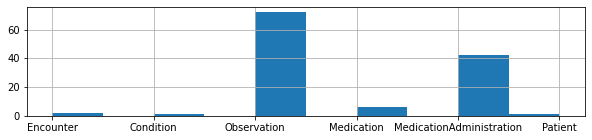

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-17UKE.json


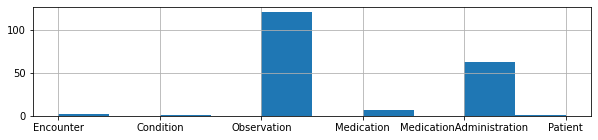

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-18UKE.json


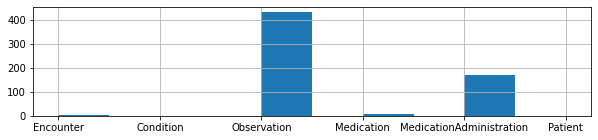

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-19UKE.json


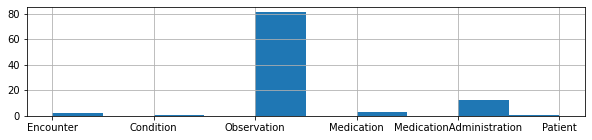

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-1UKE.json


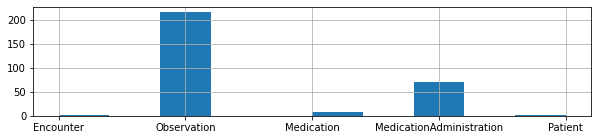

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-20UKE.json


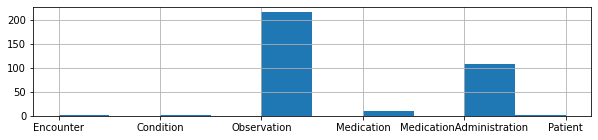

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-2UKE.json


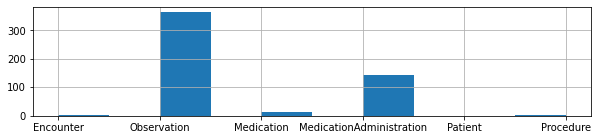

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-3UKE.json


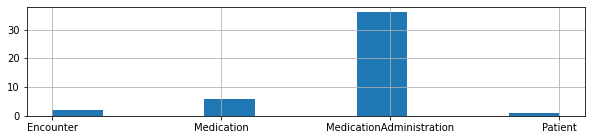

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-4UKE.json


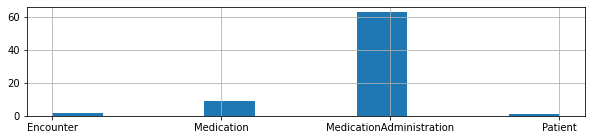

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-5UKE.json


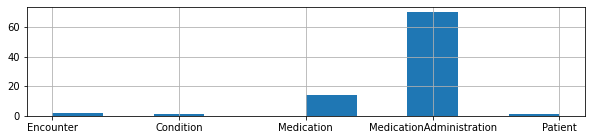

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-6UKE.json


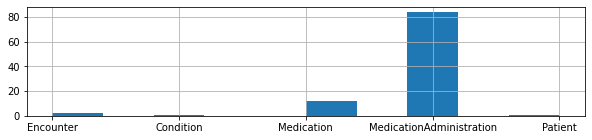

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-7UKE.json


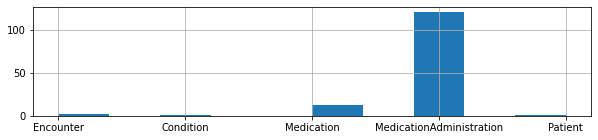

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-8UKE.json


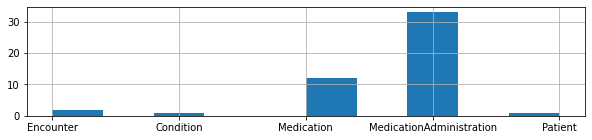

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-9UKE.json


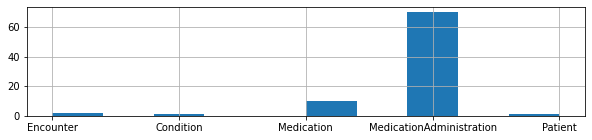

In [ ]:
# ein JSON-Files von URL laden
# einen Überblick über die enthaltenen FHIR-Ressourcen machen (-> Histogramm)

for u in urls:
  print(u)
  df = pd.read_json(u)
  df_entry = pd.json_normalize(df['entry'])
  #df_entry['resource.resourceType'].hist()
  plt.figure()
  df_entry['resource.resourceType'].hist(figsize=(10,2))
  plt.show()

In [ ]:
# die einzelnen FHIR - ressourcen in ein Datenframe laden

df_entry_full = pd.DataFrame()

for u in urls:
  print(u)
  df = pd.read_json(u)
  df_entry = pd.json_normalize(data = df['entry'])
  df_entry_full = pd.concat([df_entry_full, df_entry], ignore_index = True)

https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-10UKE.json
https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-11UKE.json
https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-12UKE.json
https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-13UKE.json
https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-14UKE.json
https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-15UKE.json
https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-16UKE.json
https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-17UKE.json
https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-18UKE.json
https://raw.githubusercontent.com/alexontour/snippets/main/testdata/POLAR_Testdaten_UKE-19UKE.json
https://ra

In [ ]:
df_entry_full

,resource.resourceType,resource.meta.profile,resource.status,resource.class.system,resource.class.code,resource.serviceType.coding,resource.subject.reference,resource.period.start,resource.period.end,resource.partOf.reference,...,resource.name,resource.gender,resource.birthDate,resource.effectiveDateTime,resource.valueQuantity.value,resource.valueQuantity.unit,resource.valueQuantity.system,resource.valueQuantity.code,resource.category.coding,resource.performedDateTime
0,Encounter,[https://www.medizininformatik-initiative.de/f...,finished,https://www.medizininformatik-initiative.de/fh...,ub,[{'system': 'https://www.medizininformatik-ini...,Patient/10UKE,2020-09-04T00:00:00+02:00,2020-09-09T00:00:00+02:00,Encounter/10UKEE-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Condition,[https://www.medizininformatik-initiative.de/f...,NaN,NaN,NaN,NaN,Patient/10UKE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Medication,[https://www.medizininformatik-initiative.de/f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MedicationAdministration,[https://www.medizininformatik-initiative.de/f...,completed,NaN,NaN,NaN,Patient/10UKE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medication,[https://www.medizininformatik-initiative.de/f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,MedicationAdministration,[https://www.medizininformatik-initiative.de/f...,completed,NaN,NaN,NaN,Patient/9UKE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3599,MedicationAdministration,[https://www.medizininformatik-initiative.de/f...,completed,NaN,NaN,NaN,Patient/9UKE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3600,MedicationAdministration,[https://www.medizininformatik-initiative.de/f...,completed,NaN,NaN,NaN,Patient/9UKE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3601,Patient,[https://www.medizininformatik-initiative.de/f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"[{'use': 'official', 'family': 'p', 'given': [...",male,1954-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Überblick über das Datenframe 
df_entry_full['resource.resourceType'].describe()

count                         3603
unique                           7
top       MedicationAdministration
freq                          1676
Name: resource.resourceType, dtype: object

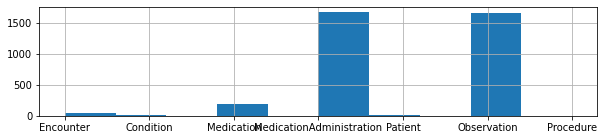

In [ ]:
# Welche FHIR Ressourcen gibt es im Datensatz (über mehrere Files)

df_entry_full['resource.resourceType'].hist(figsize=(10,2))

In [ ]:
# wieviel Patienten gibt es im Datensatz

df_entry_full.loc[(df_entry_full['resource.resourceType']=='Patient')]['resource.id'].describe()

count        20
unique       20
top       10UKE
freq          1
Name: resource.id, dtype: object

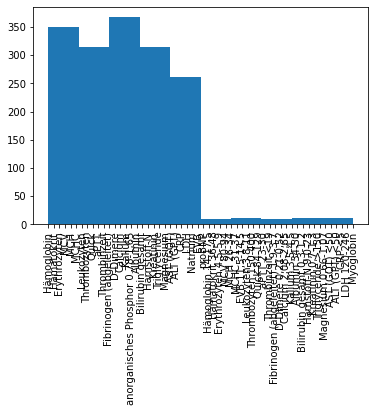

In [ ]:
# Welche Observations gibt es im Datensatz (über mehrere Files)

#df_entry_full.loc[(df_entry_full['resource.resourceType']=='Observation')]['resource.code.text'].hist(figsize=(30,2))
data = df_entry_full.loc[(df_entry_full['resource.resourceType']=='Observation')]['resource.code.text']
p = plt.hist(data)
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
# Filtern nach ATC-Code
# ATC N06A - Antidepressiva

df_entry_full['resource.code.coding'] = df_entry_full['resource.code.coding'].astype(pd.StringDtype())

df_entry_full_filter = df_entry_full.loc[df_entry_full['resource.code.coding'].str.contains('N06A')==True]
df_entry_full_filter

,resource.resourceType,resource.meta.profile,resource.status,resource.class.system,resource.class.code,resource.serviceType.coding,resource.subject.reference,resource.period.start,resource.period.end,resource.partOf.reference,...,resource.name,resource.gender,resource.birthDate,resource.effectiveDateTime,resource.valueQuantity.value,resource.valueQuantity.unit,resource.valueQuantity.system,resource.valueQuantity.code,resource.category.coding,resource.performedDateTime
14,Medication,[https://www.medizininformatik-initiative.de/f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_temp = pd.json_normalize(df_entry_full['resource.ingredient'], errors='ignore')




AttributeError: ignored

In [ ]:
df_temp

""
0
1
2
3
4
...
3598
3599
3600
3601


In [ ]:
item = df_entry_full.entry[10]['resource']['code']['coding'][1]['code']


In [ ]:
df_entry_full

# Lost & Found

In [ ]:
#import requests
#from pandas.io.json import json_normalize

#resp = requests.get(url=url)

# Handling nested JSON:
#df = pd.json_normalize(resp.json())
#df.head()

In [ ]:
#print(len(df['entry'][0]))
#df['entry'][0][10]['resource']['subject']['reference']
#df